In [1]:
from nilearn import image, plotting
import numpy as np

## Roi File

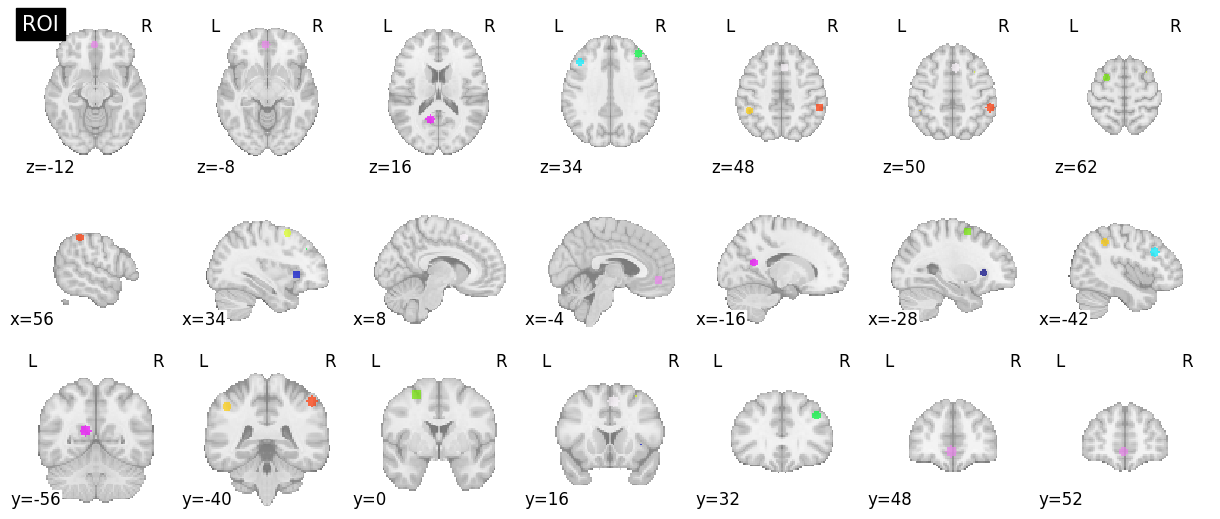

In [2]:
roi_file = "grantmask_labeled.nii"

plotting.plot_roi(roi_file, display_mode='mosaic',  title="ROI")

In [3]:
roi_mask_image = image.load_img(roi_file)

roi_mask_data = roi_mask_image.get_fdata()

print("ROI mask data shape: ", roi_mask_data.shape)

# find non-zero indices
roi_mask_indices = np.argwhere(roi_mask_data)

print("ROI mask indices shape: ", roi_mask_indices[0].shape)

roi_mask_indices

ROI mask data shape:  (91, 109, 91)
ROI mask indices shape:  (3,)


array([[16, 43, 61],
       [17, 41, 60],
       [17, 41, 61],
       ...,
       [70, 43, 58],
       [70, 43, 59],
       [71, 41, 58]])

# Test ROI Extract function

In [ ]:
import utils

roi_values, _, _ = utils.roi_extract_all_node_func

## Test Masking a 4D image with a 3D mask (not registered)

/home/011/d/ds/dss210005/.conda/envs/fmri-pipeline/lib/python3.12/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



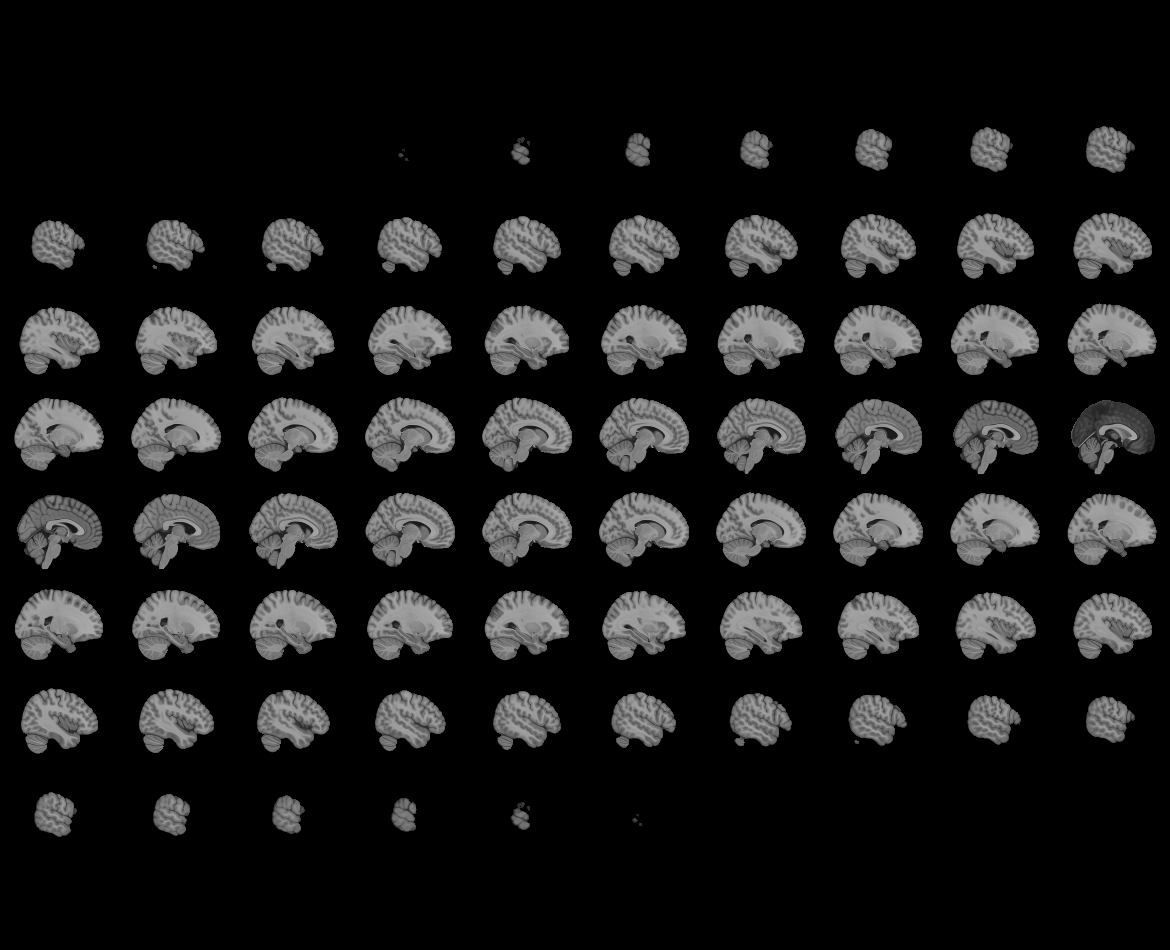
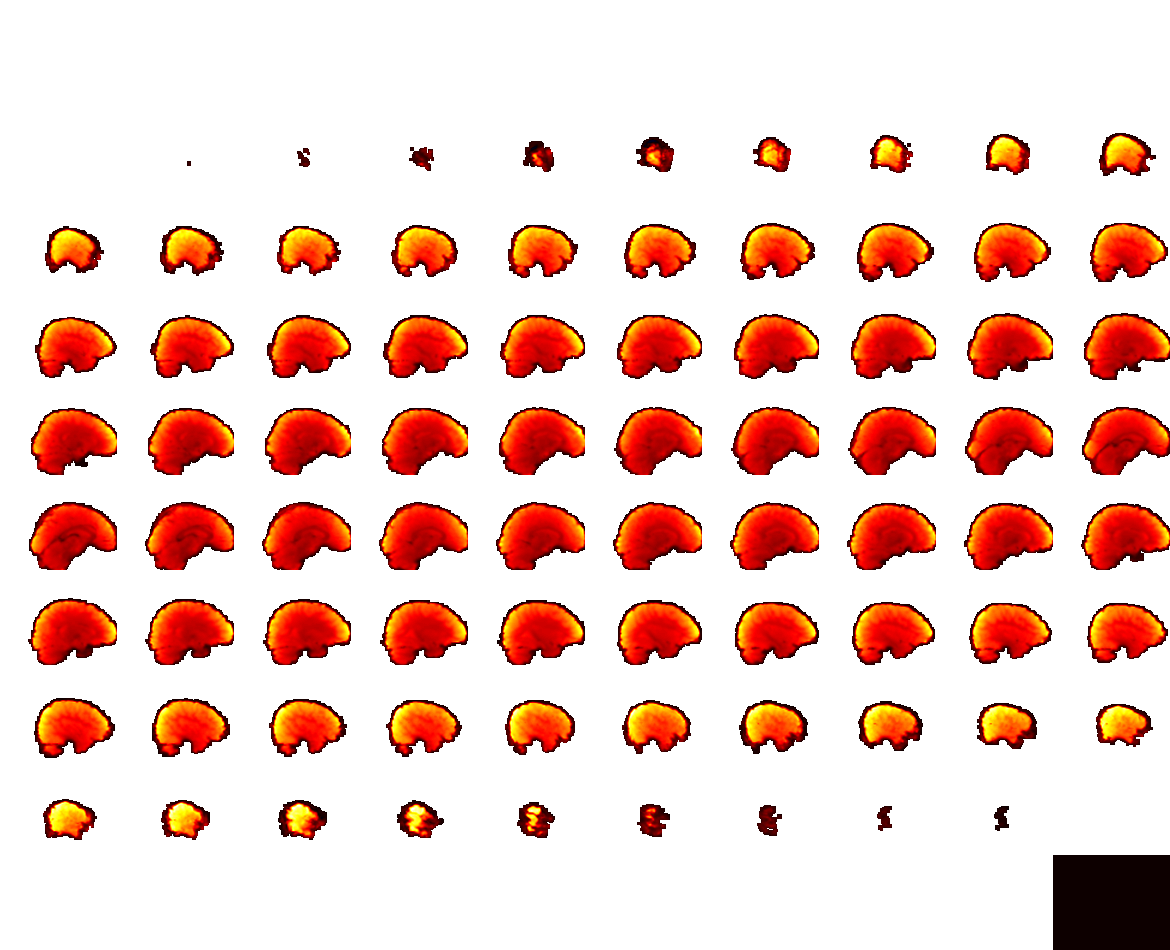

In [4]:
test_image_path = "/mnt/storage/daniel/feat-preprocess-datasink/sub-NDARINVZT44Y065_ses-baselineYear1Arm1_task-sst_run-01NL.feat/filtered_func_data.nii.gz"

test_image = image.load_img(test_image_path)

first_volume = image.index_img(test_image, 0)

plotting.view_img(first_volume, 
                title="Test filtered func")

## Check number of zfstat paths

In [4]:
import utils
import constants

feat_datasink = constants.INPUT_FEAT_DATASINK

linear_zfstat_paths = utils.get_all_zfstat_paths_from_feat_datasink(feat_datasink, verbose=False, type="linear")

print(f"Found {len(linear_zfstat_paths)} linear zfstat paths")

nonlinear_zfstat_paths = utils.get_all_zfstat_paths_from_feat_datasink(feat_datasink, verbose=False, type="nonlinear")

print(f"Found {len(nonlinear_zfstat_paths)} nonlinear zfstat paths")

print("Some linear zfstat paths: ", linear_zfstat_paths[:3])
print("Some nonlinear zfstat paths: ", nonlinear_zfstat_paths[:3])

Found 3870 linear zfstat paths
Found 3870 nonlinear zfstat paths
Some linear zfstat paths:  ['/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat1_LN.nii.gz', '/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat2_LN.nii.gz', '/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat3_LN.nii.gz']
Some nonlinear zfstat paths:  ['/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat1_NL.nii.gz', '/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat2_NL.nii.gz', '/mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-b

In [5]:
zfstat_paths, affine_files = utils.get_all_zfstat_paths_and_affine_files_from_feat_datasink(feat_datasink)

print(f"Found {len(zfstat_paths)} zfstat paths and {len(affine_files)} affine files")

for i in range(0, 10):
    shortened_zfstat_path = zfstat_paths[i].split("/")    
    shortened_zfstat_path = "/".join(shortened_zfstat_path[6:])
    
    shortened_affine_path = affine_files[i].split("/")    
    shortened_affine_path = "/".join(shortened_affine_path[6:])
    
    print(f"{shortened_zfstat_path} -> {shortened_affine_path}")

Found 3870 zfstat paths and 3870 affine files
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat1.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat2.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat3.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat4.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat5.nii.gz -> sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/reg/example_func2standard.mat
sub-NDARINVY6FE3R8A_ses-baselineYe

In [6]:
from importlib import reload
import utils
reload(utils)
import utils

## Check Registration

/home/011/d/ds/dss210005/.conda/envs/fmri-pipeline/lib/python3.12/site-packages/nilearn/plotting/displays/_slicers.py:160: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figure, figsize=figsize, facecolor=facecolor)


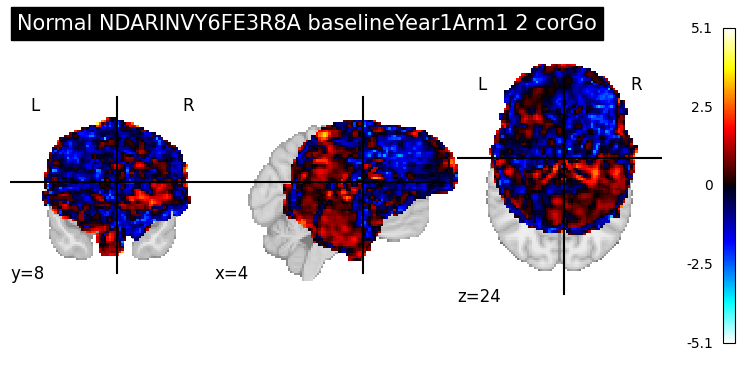

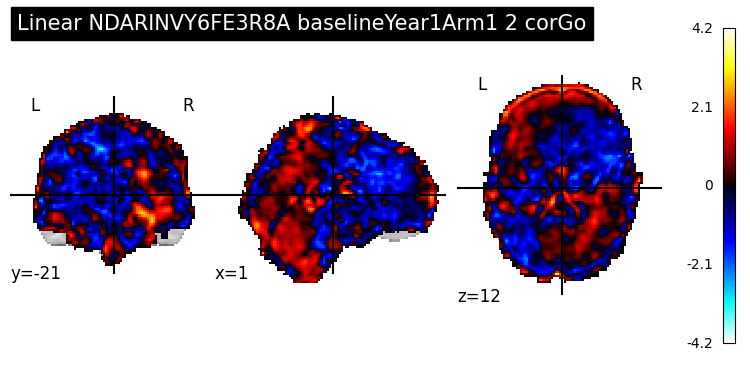

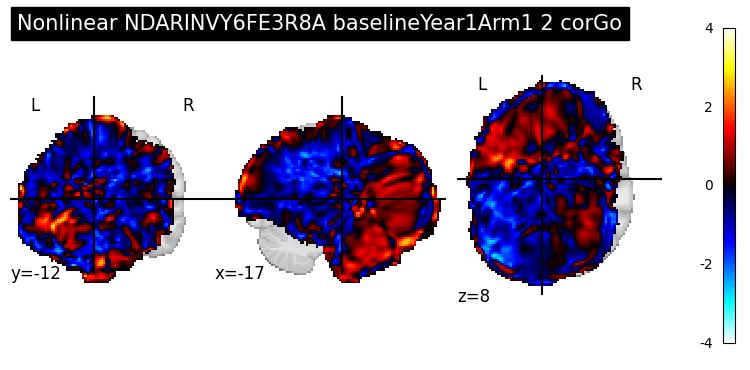

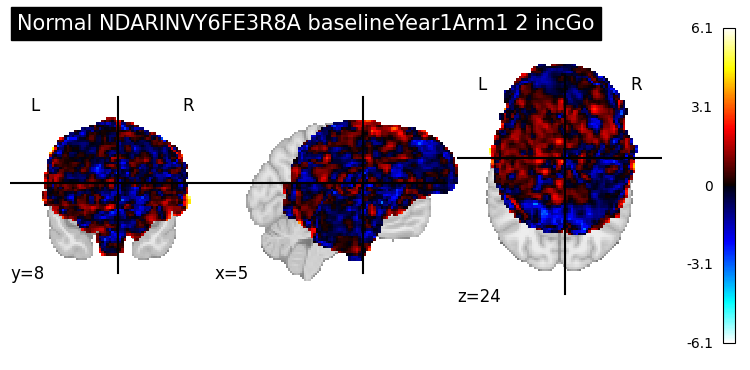

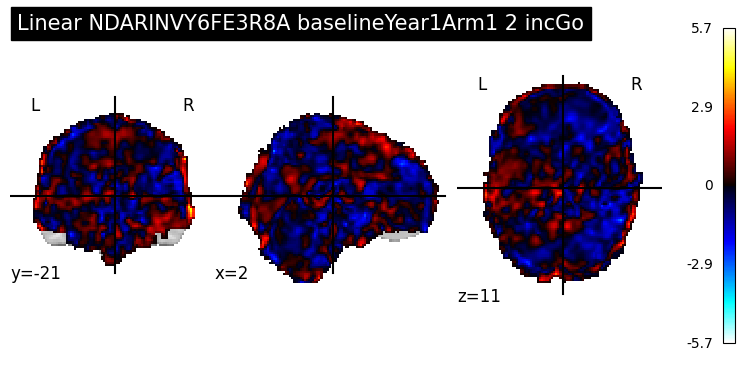

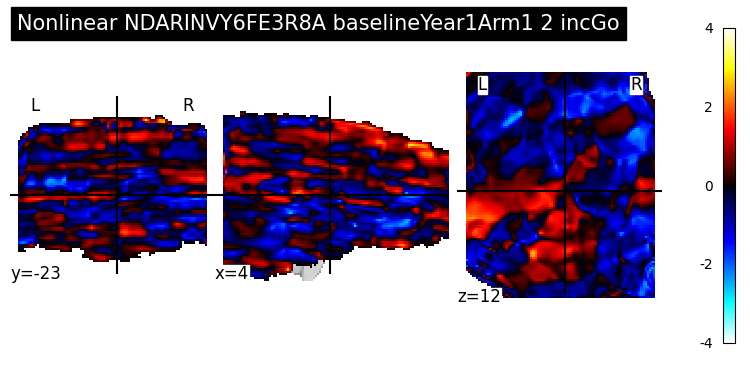

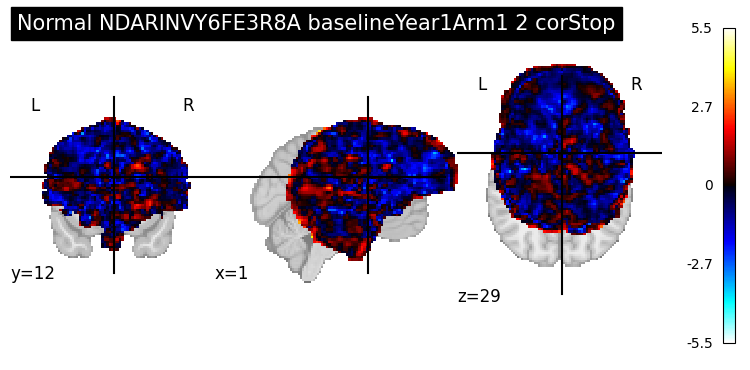

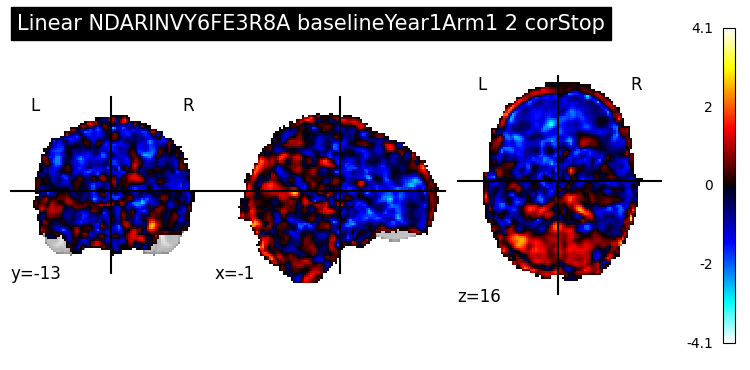

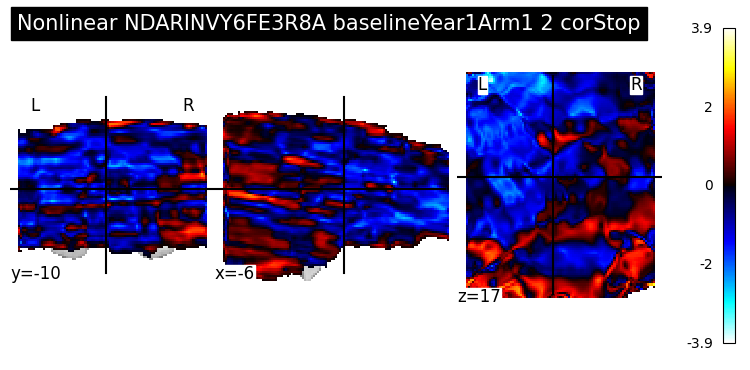

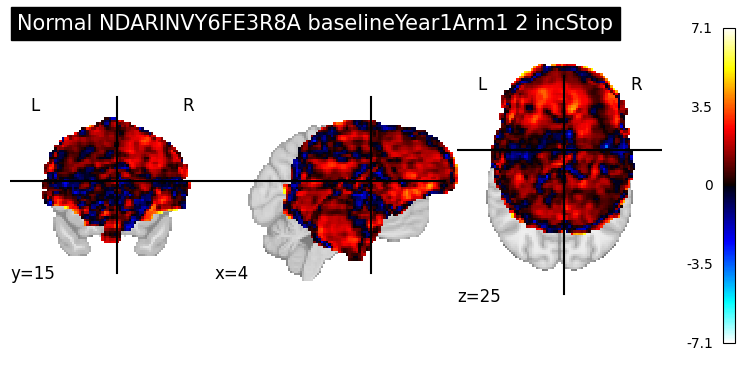

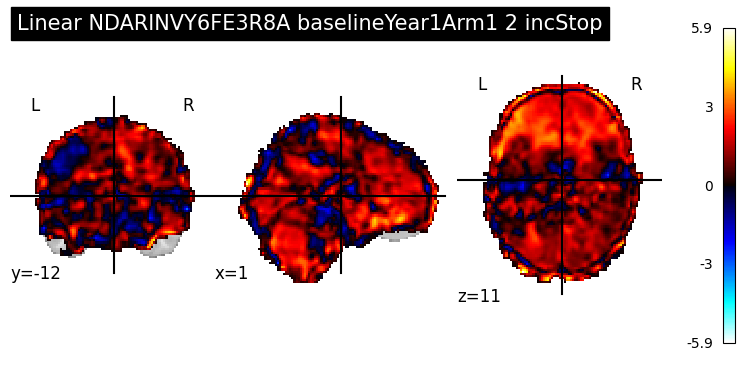

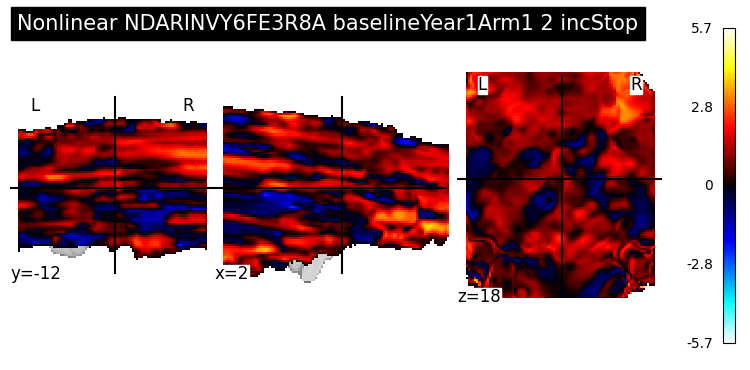

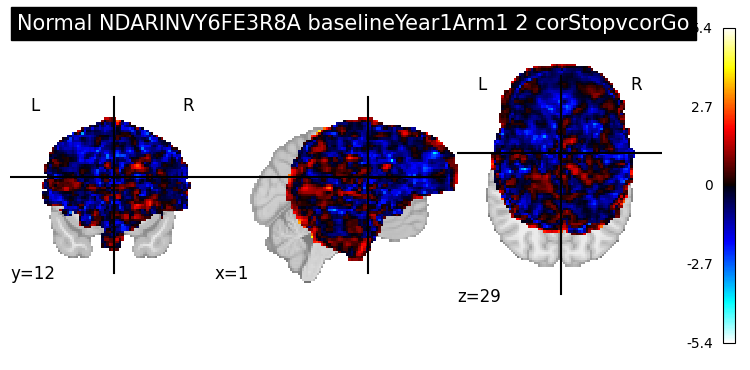

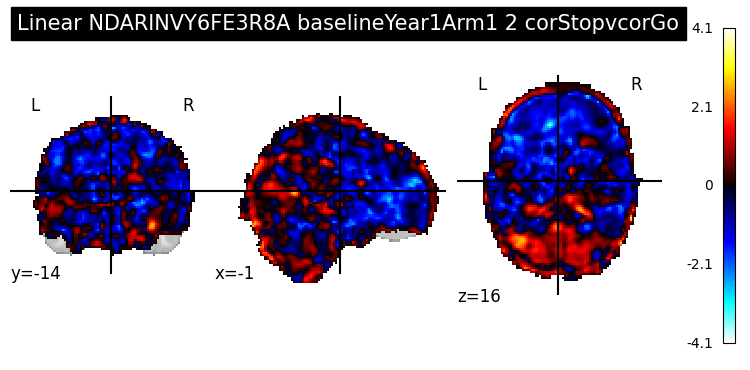

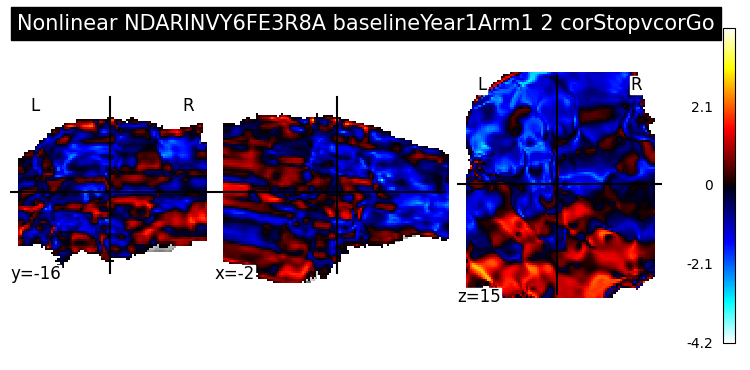

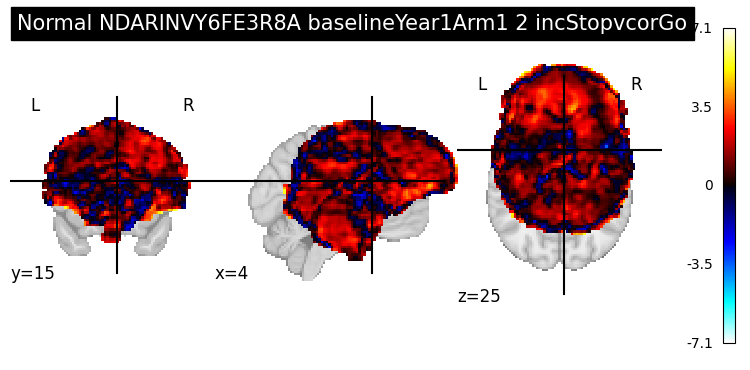

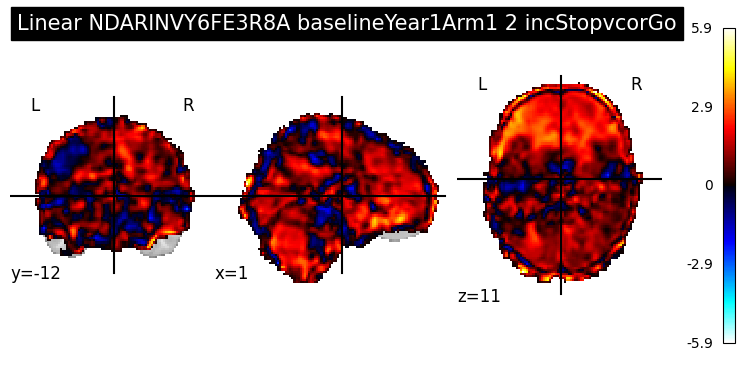

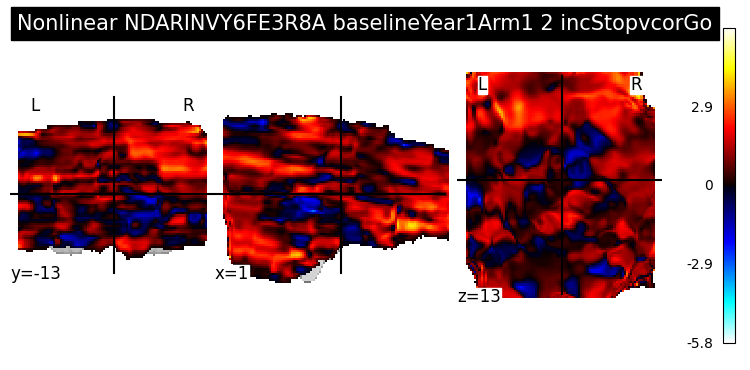

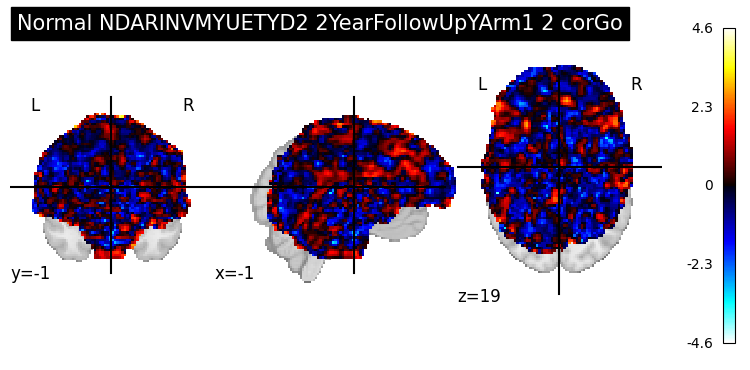

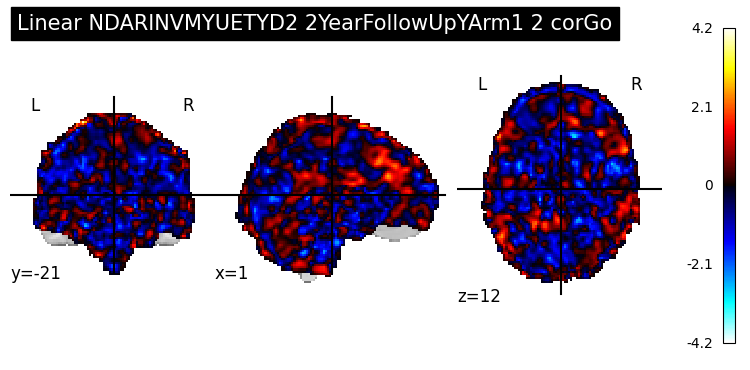

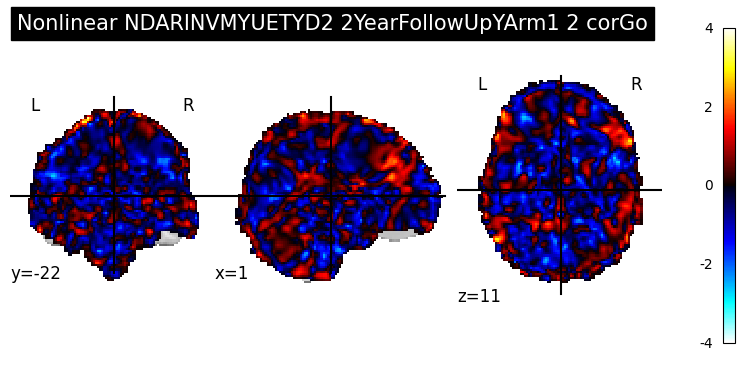

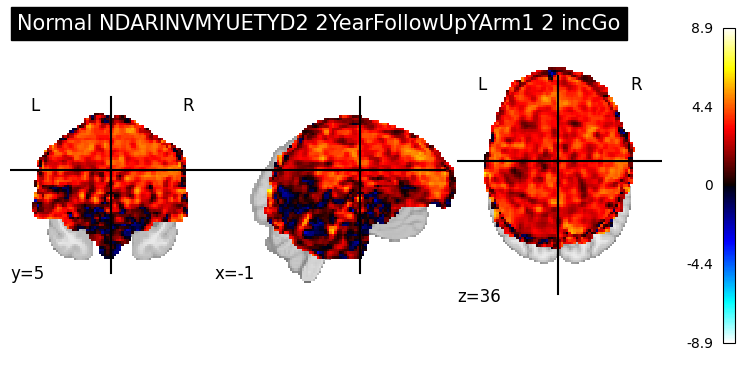

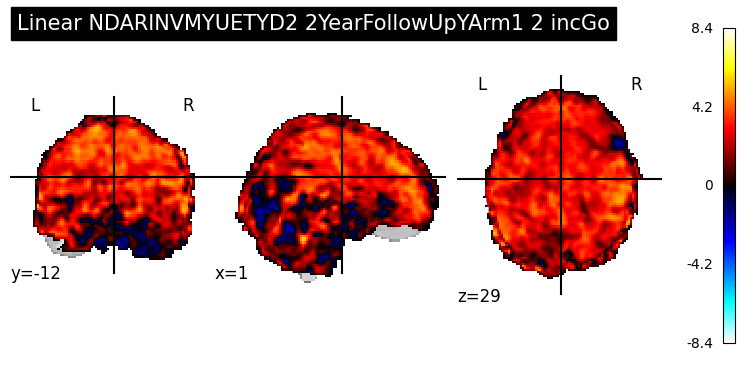

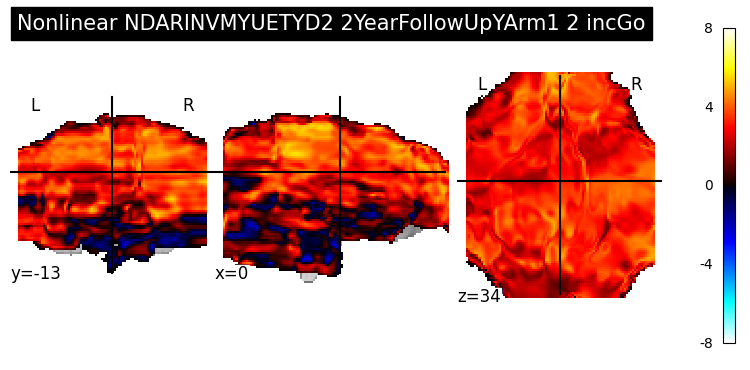

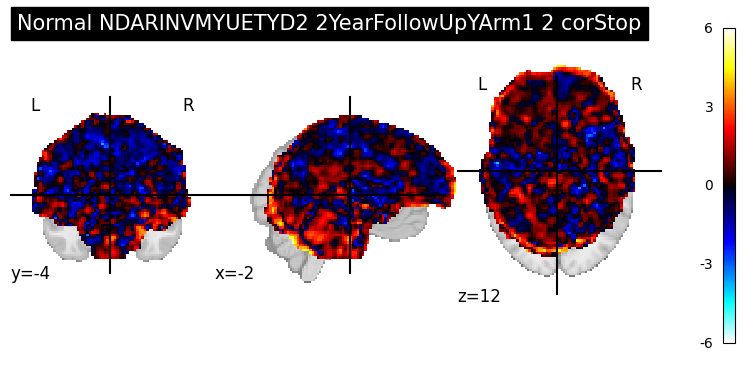

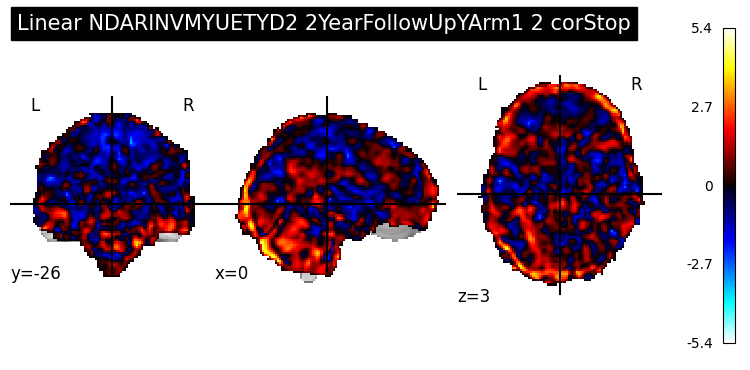

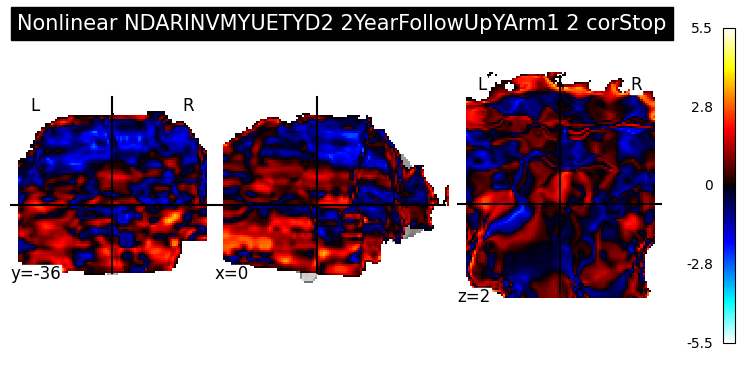

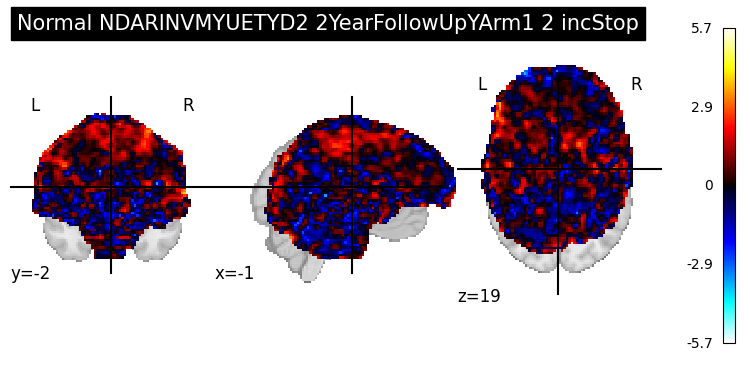

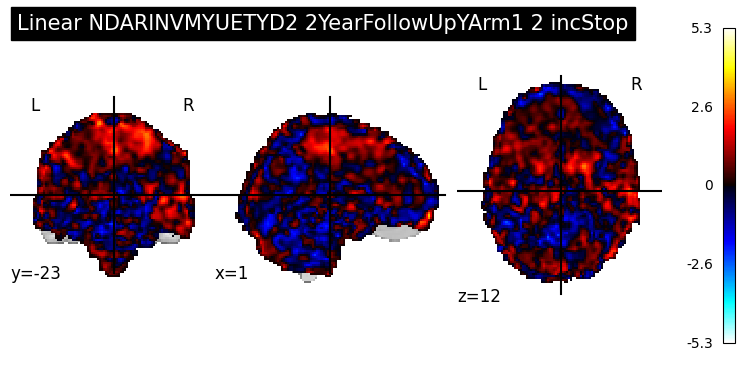

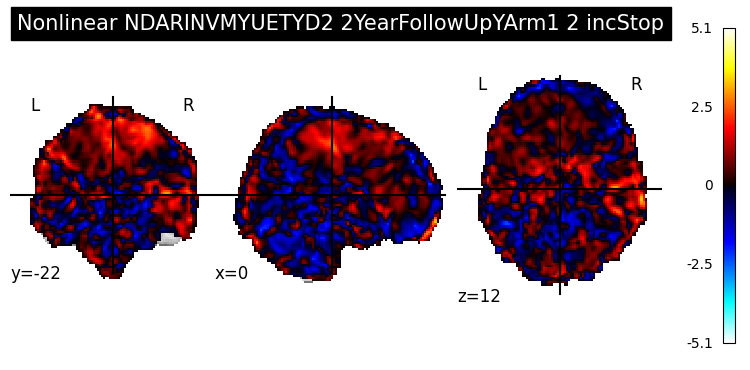

In [9]:
# index = 3000

# zfstat_image = image.load_img(nonlinear_zfstat_paths[index])

# plotting.view_img(zfstat_image, title=f"Nonlinear zfstat {index}")
import regex as re
import utils


for index in range(0, 6):
    subject_id = utils.get_subject_id_from_zfstat_path(nonlinear_zfstat_paths[index])
    run = utils.get_run_from_zfstat_path(nonlinear_zfstat_paths[index])
    image_name = utils.get_image_name_from_zfstat_path(nonlinear_zfstat_paths[index])
    session = utils.get_session_from_zfstat_path(nonlinear_zfstat_paths[index])
        
    
    normal_zfstat_image = image.load_img(zfstat_paths[index])      
    linear_zfstat_image = image.load_img(linear_zfstat_paths[index])
    nonlinear_zfstat_image = image.load_img(nonlinear_zfstat_paths[index])                
    
    
    plotting.plot_stat_map(normal_zfstat_image, display_mode='ortho',  title=f"Normal {subject_id} {session} {run} {image_name}")
    plotting.plot_stat_map(linear_zfstat_image, display_mode='ortho',  title=f"Linear {subject_id} {session} {run} {image_name}")
    plotting.plot_stat_map(nonlinear_zfstat_image, display_mode='ortho',  title=f"Nonlinear {subject_id} {session} {run} {image_name}")

# plotting.plot_stat_map(zfstat_image, display_mode='mosaic',  title=f"Nonlinear zfstat {index}")

## Checking Registrations

In [9]:
# mni_image = image.load_img(constants.MNI_TEMPLATE)

# print(f"MNI image shape: {mni_image.shape}")

# mni_image_data = mni_image.get_fdata()

# def check_registration_quality_mni(registered_image_path: str) -> bool:
#     # Load the registered image and MNI template
#     registered_image = image.load_img(registered_image_path)    

#     # Get the data from the images
#     registered_image_data = registered_image.get_fdata()    

#     # Check for non-zero values outside the MNI template
#     outside_mask = (mni_image_data == 0) & (registered_image_data != 0)

#     is_any_outside = np.any(outside_mask)

#     print(f"Non-zero values outside the MNI template: {is_any_outside}")

#     if np.any(outside_mask):
#         print(f"Warning: Non-zero values found outside the MNI template for {registered_image_path}")
#         return False
#     else:
#         print(f"Registration quality is good for {registered_image_path}")
#         return True

# # Test the function
# res = check_registration_quality_mni(nonlinear_zfstat_paths[2])
# print(f"zfstat_paths[0]: {nonlinear_zfstat_paths[0]} -> {res}")              

MNI image shape: (91, 109, 91)
Non-zero values outside the MNI template: True
zfstat_paths[0]: /mnt/storage/daniel/feat-preprocess-datasink/2024-04-21_23-16-00/sub-NDARINVY6FE3R8A_ses-baselineYear1Arm1_task-sst_run-02NL.feat/stats/zfstat1_NL.nii.gz -> False


## Sanity Checks for ROI Activations CSV File

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [11]:
test_df = pd.read_csv('testdatasink/roi_csv/roi_activations.csv')

test_df.head()

# rename 'avg' column to 'activation'
test_df.rename(columns={'avg': 'activation'}, inplace=True)

# change all values in activation column to be random values between -10 and 10
test_df['activation'] = np.random.uniform(-10, 10, test_df.shape[0])

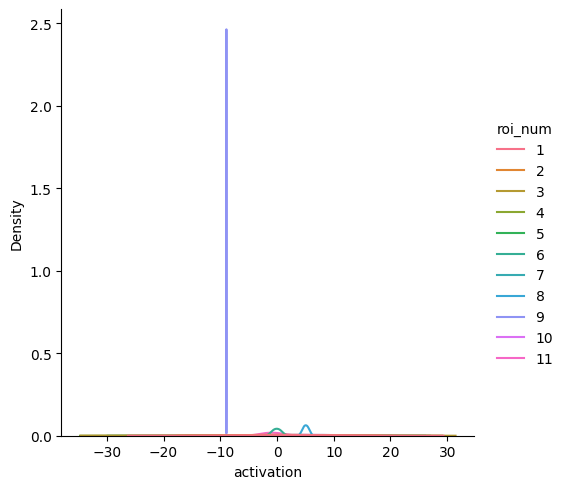

In [12]:
sns.displot(test_df.astype({"roi_num":"category"}), x="activation", hue="roi_num", kind="kde")

### Real roi activations file

In [2]:
roi_activations_df = pd.read_csv("/mnt/storage/daniel/roi-datasink/roi_csv/_force_run_False_mni_template_..usr..local..fsl..data..standard..MNI152_T1_2mm_brain.nii.gz_nonlinear_False/roi_activations.csv")

# rename 'avg' column to 'activation'
roi_activations_df.rename(columns={'avg': 'activation'}, inplace=True)

roi_activations_df.head()

,activation,roi_num,subject_id,run,image_name,is_nonlinear,session
0,0.144099,1,NDARINVY6FE3R8A,2,corGo,False,baselineYear1Arm1
1,-1.512764,2,NDARINVY6FE3R8A,2,corGo,False,baselineYear1Arm1
2,0.126904,3,NDARINVY6FE3R8A,2,corGo,False,baselineYear1Arm1
3,-0.778236,4,NDARINVY6FE3R8A,2,corGo,False,baselineYear1Arm1
4,-0.274630,5,NDARINVY6FE3R8A,2,corGo,False,baselineYear1Arm1


### Adding Group column

In [3]:
def add_group_column(roi_activations_df: pd.DataFrame) -> pd.DataFrame:
    with open("../subjects/pilot_anx_subjects.txt") as f:
        pilot_anx_subject_ids = f.read().splitlines()
    
    # with open("../subjects/subject_same_mri.txt") as f:        
    #     lines = f.read().splitlines()
        
    #     original_50_subject_ids = []
        
    #     for subject_id in lines:
    #         if subject_id not in pilot_anx_subject_ids:
    #             original_50_subject_ids.append(subject_id)
    
    roi_activations_df['group'] = np.where(roi_activations_df['subject_id'].isin(pilot_anx_subject_ids), 'pilot_anx', 'original_50')
    
    return roi_activations_df

roi_activations_df = add_group_column(roi_activations_df)

print(roi_activations_df["group"].value_counts())

roi_activations_df.head()    

group
pilot_anx      31878
original_50    10692
Name: count, dtype: int64


,activation,roi_num,subject_id,run,image_name,is_nonlinear,session,group
0,0.144099,1,NDARINVY6FE3R8A,2,corGo,False,baselineYear1Arm1,pilot_anx
1,-1.512764,2,NDARINVY6FE3R8A,2,corGo,False,baselineYear1Arm1,pilot_anx
2,0.126904,3,NDARINVY6FE3R8A,2,corGo,False,baselineYear1Arm1,pilot_anx
3,-0.778236,4,NDARINVY6FE3R8A,2,corGo,False,baselineYear1Arm1,pilot_anx
4,-0.274630,5,NDARINVY6FE3R8A,2,corGo,False,baselineYear1Arm1,pilot_anx


## Checking ROI Activations

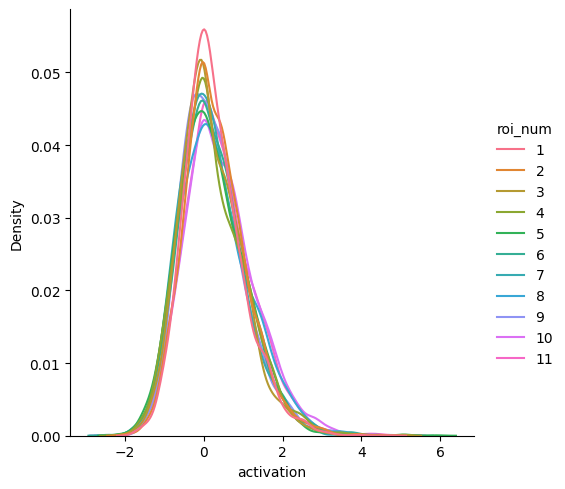

In [4]:
sns.displot(roi_activations_df.astype({"roi_num":"category"}), x="activation", hue="roi_num", kind="kde")

### Run T-Tests

In [5]:
import scipy.stats as st

In [9]:
grouped_p_value_df = roi_activations_df.groupby(["group", "subject_id", "image_name","run","roi_num"])["activation"]

i = 0

def agg_func(group: pd.Series):
    global i
    if i < 5:
        print(group)
    i += 1
    return st.ttest_1samp(group, popmean=0).pvalue

grouped_p_value_df = grouped_p_value_df.agg(agg_func)

grouped_p_value_df


28908   -0.820147
40392    0.934333
Name: activation, dtype: float64
28909   -0.517859
40393    0.684735
Name: activation, dtype: float64
28910   -1.039959
40394   -0.587847
Name: activation, dtype: float64
28911   -1.602880
40395    0.300729
Name: activation, dtype: float64
28912   -1.445293
40396   -0.456265
Name: activation, dtype: float64


/home/011/d/ds/dss210005/.conda/envs/fmri-pipeline/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/011/d/ds/dss210005/.conda/envs/fmri-pipeline/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


group        subject_id       image_name     run  roi_num
original_50  NDARINV00CY2MDM  corGo          1    1          0.958625
                                                  2          0.912221
                                                  3          0.172470
                                                  4          0.618069
                                                  5          0.305329
                                                               ...   
pilot_anx    NDARINVZT44Y065  incStopvcorGo  2    7               NaN
                                                  8               NaN
                                                  9               NaN
                                                  10              NaN
                                                  11              NaN
Name: activation, Length: 24288, dtype: float64

In [22]:
p_value_df = grouped_p_value_df.reset_index().rename(columns={"activation": "p_value"})

print(f"num nans: {p_value_df['p_value'].isna().sum()} out of {p_value_df.shape[0]}")

print(f"num p_values greater than 0.05: {p_value_df[p_value_df['p_value'] > 0.05].shape[0]} out of {p_value_df.shape[0]}")

print(f"num p_values greater than 0.1: {p_value_df[p_value_df['p_value'] > 0.1].shape[0]} out of {p_value_df.shape[0]}")

print(f"num p_values greater than 0.05 for each group (pilot_anx, original_50): {p_value_df[p_value_df['p_value'] > 0.05].groupby('group').size()}")

p_value_df.head()

num nans: 8922 out of 24288
num p_values greater than 0.05: 14586 out of 24288
num p_values greater than 0.1: 13740 out of 24288
num p_values greater than 0.05 for each group (pilot_anx, original_50): group
original_50     3717
pilot_anx      10869
dtype: int64


,group,subject_id,image_name,run,roi_num,p_value
0,original_50,NDARINV00CY2MDM,corGo,1,1,0.958625
1,original_50,NDARINV00CY2MDM,corGo,1,2,0.912221
2,original_50,NDARINV00CY2MDM,corGo,1,3,0.172470
3,original_50,NDARINV00CY2MDM,corGo,1,4,0.618069
4,original_50,NDARINV00CY2MDM,corGo,1,5,0.305329


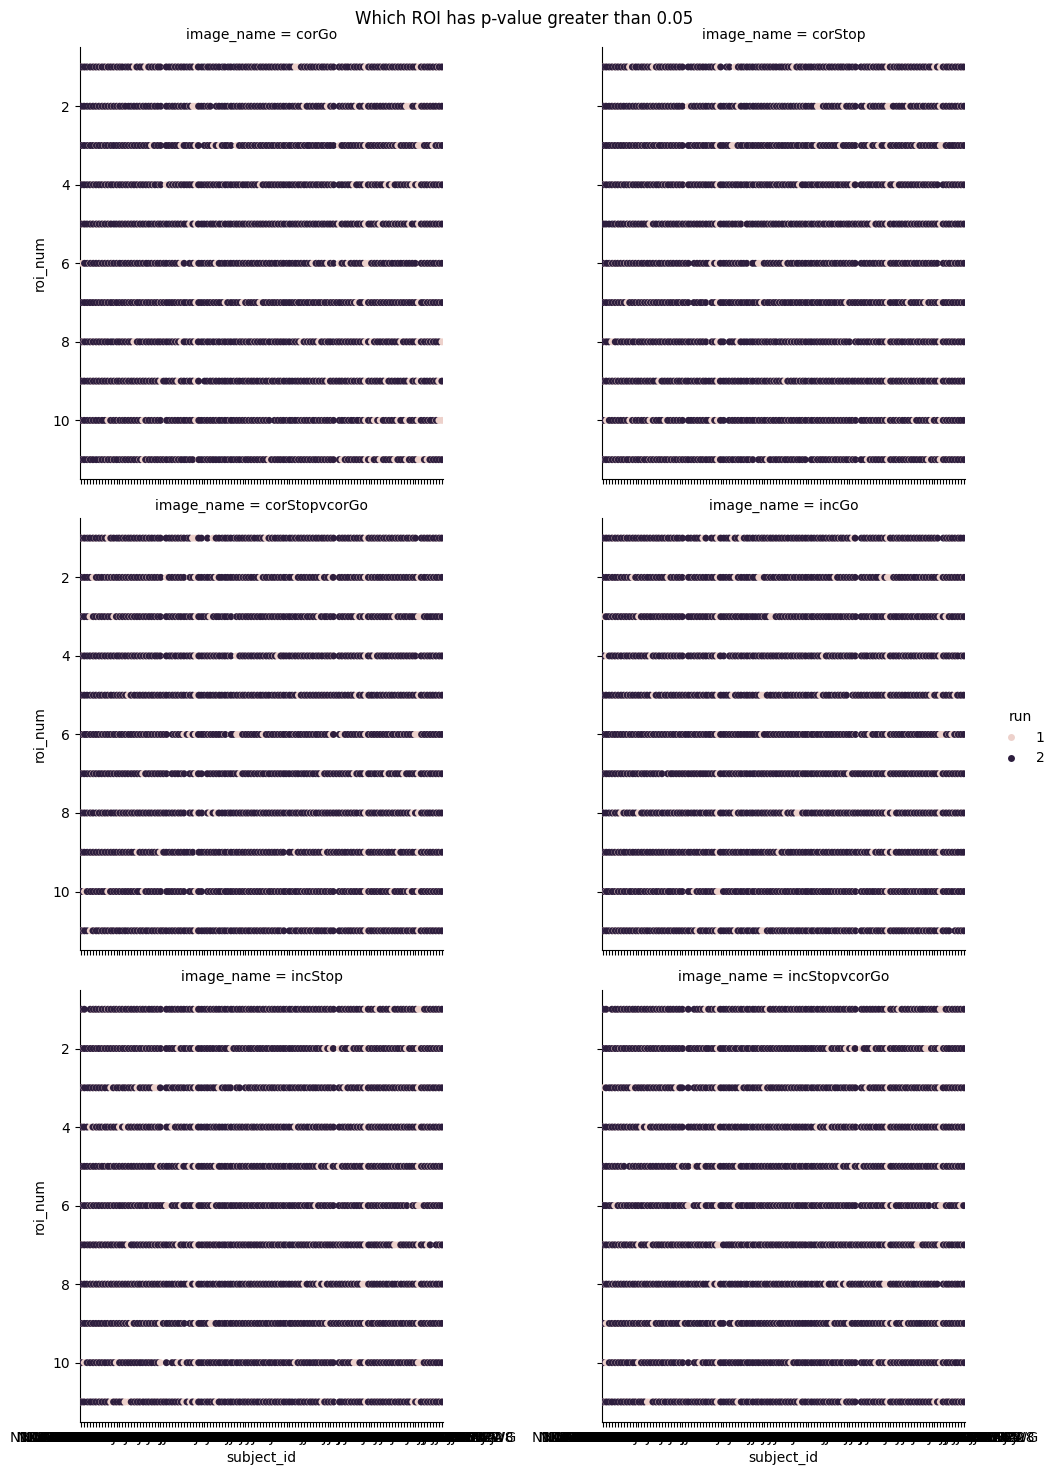

In [12]:
p_values_greater = p_value_df[p_value_df["p_value"] > 0.05].astype({"roi_num":"category"})

g = sns.catplot(p_values_greater, x="subject_id",y="roi_num", hue="run",col="image_name",col_wrap=2)
g.figure.suptitle("Which ROI has p-value greater than 0.05")
g.figure.tight_layout()

In [37]:
bad_roi_count_df = p_value_df[p_value_df["p_value"] > 0.05].groupby(["subject_id", "image_name", "run"])["roi_num"].count().reset_index()#["subid"].unique()

bad_roi_count_df = bad_roi_count_df.rename(columns={"roi_num": "bad_roi_count"})

bad_roi_count_df

,subject_id,image_name,run,bad_roi_count
0,NDARINV00CY2MDM,corGo,1,11
1,NDARINV00CY2MDM,corGo,2,10
2,NDARINV00CY2MDM,corStop,1,11
3,NDARINV00CY2MDM,corStop,2,11
4,NDARINV00CY2MDM,corStopvcorGo,1,11
...,...,...,...,...
1405,NDARINVZMMCVRWG,incGo,2,11
1406,NDARINVZMMCVRWG,incStop,1,11
1407,NDARINVZMMCVRWG,incStop,2,11
1408,NDARINVZMMCVRWG,incStopvcorGo,1,11


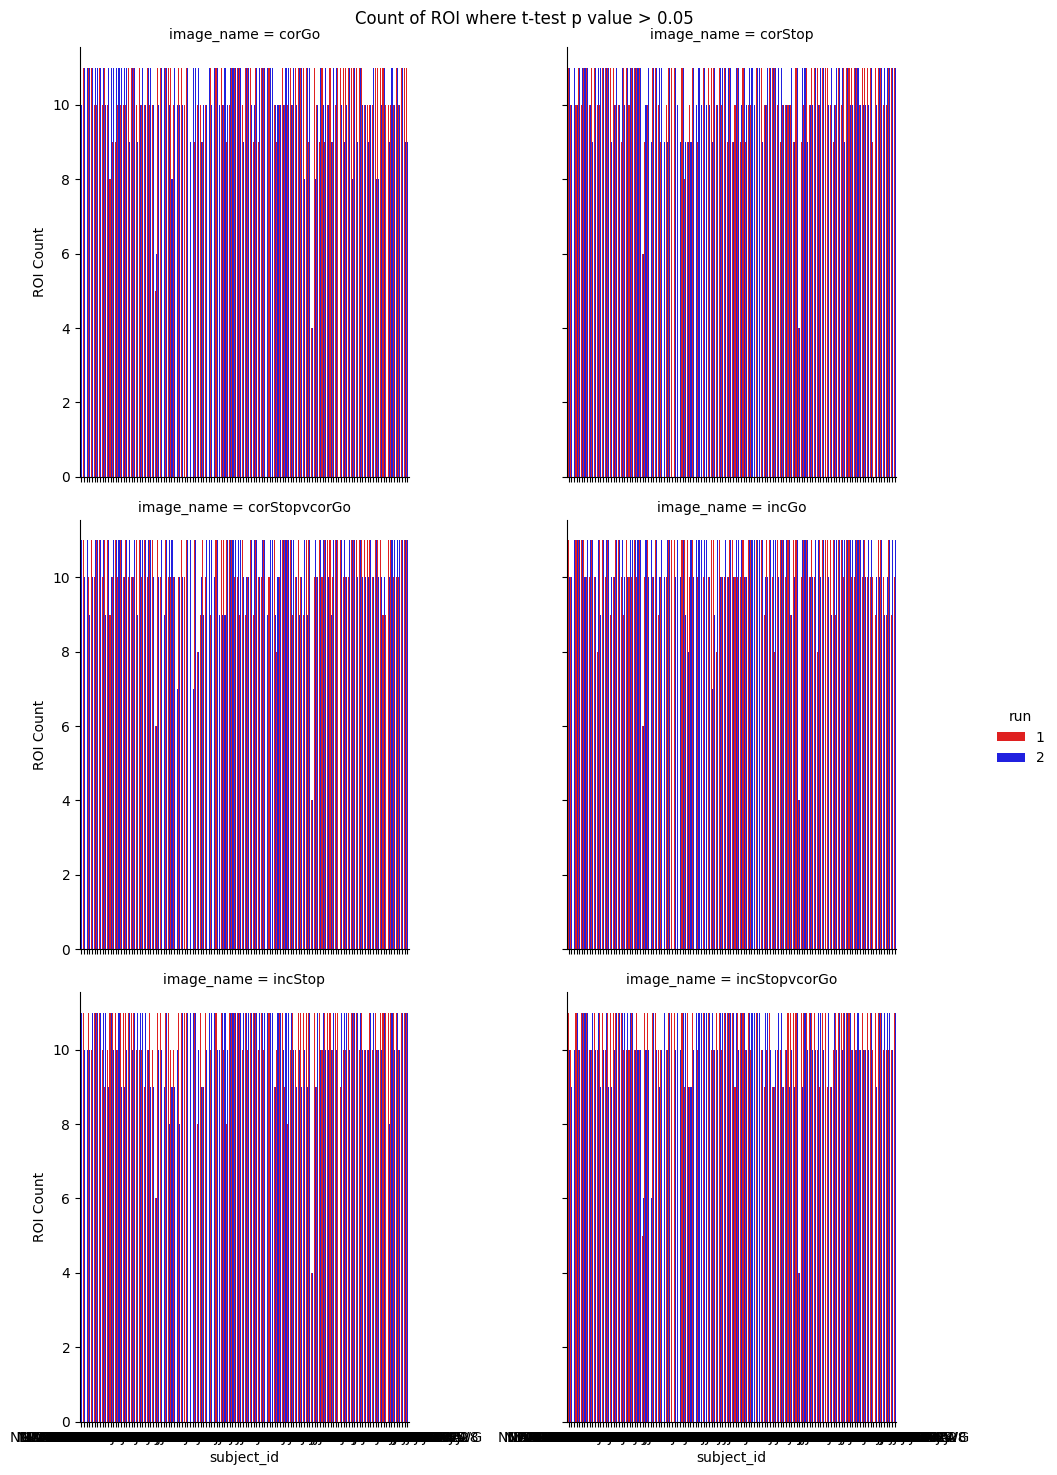

In [38]:
run_colors = {1: "red", 2: "blue"}

g = sns.catplot(bad_roi_count_df, x="subject_id",y="bad_roi_count", hue="run", col="image_name", kind="bar", col_wrap=2, palette=run_colors)
g.set_ylabels("ROI Count")
g.figure.suptitle("Count of ROI where t-test p value > 0.05")
g.tight_layout()